# Hamiltonian Systems

## Example 1

The system is 

$$
\begin{gather*}
    \begin{bmatrix}
        \dot{x} \\ \dot{y} 
    \end{bmatrix}
    = 
    \begin{bmatrix}
        y \left( 13 - x^2 - y^2 \right)\\
        12 - x\left( 13 - x^2 - y^2 \right)
    \end{bmatrix}
\end{gather*}
$$

The fixed points for this Hamiltonian system are (1, 0), (3, 0), and (-4, 0) $\longrightarrow$ see J&S pg.79

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
def sys1(t, x):
    return [x[1] * (13 - x[0]**2 - x[1]**2), 12 - x[0] * (13 - x[0]**2 - x[1]**2)]

In [4]:
def solve_diffeq(func, t, tspan, ic, parameters={}, algorithm='DOP853', stepsize=np.inf):
    return solve_ivp(fun=func, t_span=tspan, t_eval=t, y0=ic, method=algorithm, 
                     args=tuple(parameters.values()), atol=1e-8, rtol=1e-5, max_step=stepsize)

def phasePlane(x1, x2, func):
    X1, X2 = np.meshgrid(x1, x2)  # create grid
    u, v = np.zeros(X1.shape), np.zeros(X2.shape)
    NI, NJ = X1.shape
    for i in range(NI):
        for j in range(NJ):
            x = X1[i, j]
            y = X2[i, j]
            dx = func(0, (x, y))  # compute values on grid
            u[i, j] = dx[0]
            v[i, j] = dx[1]
    M = np.hypot(u, v)
    u /= M
    v /= M
    return X1, X2, u, v, M

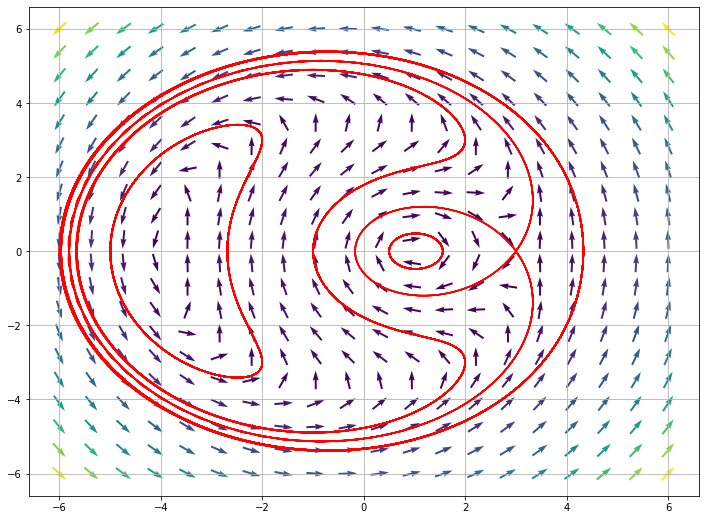

In [7]:
x0 = [
    [0.5, 0],
    [3.00001, 0],
    [-5, 0],
    [-6, 0],
    [-1, 0],
    [3, 0]
]

x1 = np.linspace(-6, 6, 20)
x2 = np.linspace(-6, 6, 20)

# Set up the figure the way we want it to look
plt.figure(figsize=(12, 9))

X1, X2, dx1, dx2, M = phasePlane(
    x1, x2, sys1
)

# Quiver plot
plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
plt.grid()

t1 = np.linspace(0, -10.0, 1000)
t2 = np.linspace(0, 10.0, 1000)
t_span1 = (np.max(t1), np.min(t1))
t_span2 = (np.min(t2), np.max(t2))
for x0i in x0:
    sol1 = solve_diffeq(sys1, t1, t_span1, x0i)
    plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
    sol2 = solve_diffeq(sys1, t2, t_span2, x0i)
    plt.plot(sol2.y[0, :], sol2.y[1, :], '-r')
           
# plt.xlim([-3, 3])
# plt.ylim([-3, 3])
plt.show()

In [ ]:
x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)

# Set up the figure the way we want it to look
plt.figure(figsize=(12, 9))

# Contour
plt.grid()
X1, X2 = np.meshgrid(x1, x2)  # create grid
u, v = np.zeros(X1.shape), np.zeros(X2.shape)
NI, NJ = X1.shape
Z = np.zero(X1.shape)
for i in range(NI):
    for j in range(NJ):
        x = X1[i, j]
        y = X2[i, j]
        dx = func(0, (x, y))  # compute values on grid
        u[i, j] = dx[0]
        v[i, j] = dx[1]
plt.contour(x1, x2, Z, 20, cmap='RdGy')

# plt.xlim([-3, 3])
# plt.ylim([-3, 3])
plt.show()

Alternative (and faster) way to generate phase plane is using contour plot with Hamiltonian.

More difficult to see local fixed point behaviour unless lots of contour lines are used.

In [10]:
# Define the Hamiltonian 
def Hsys1(x, y):
    return -12*x + 13/2 * x**2 - 1/4 * x**4 - 1/2 * x**2 * y**2 \
            + 13/2 * y**2 - 1/4 * y**2

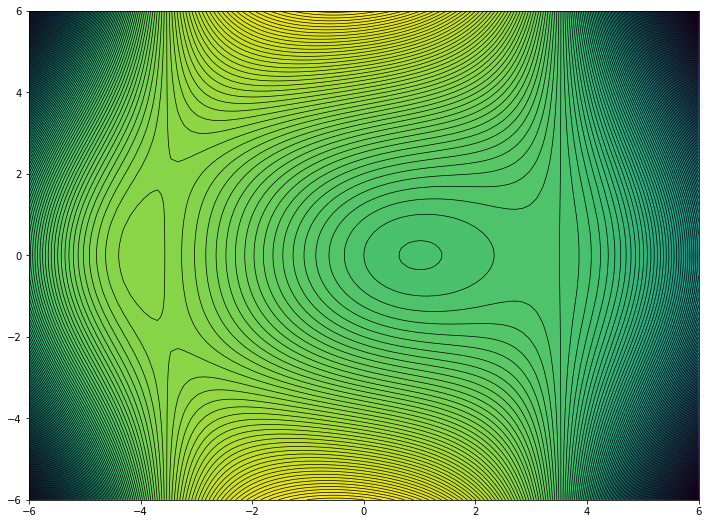

In [40]:
x1 = np.linspace(-6, 6, 100)
x2 = np.linspace(-6, 6, 100)
X1, X2 = np.meshgrid(x1, x2)  # create grid

# Compute Z values 
Z = Hsys1(X1, X2)

# Plot the contours
plt.figure(figsize=(12, 9))
plt.contour(X1, X2, Z, 175, linewidths=0.7, linestyles='solid', 
            colors='k')
plt.contourf(X1, X2, Z, 175)

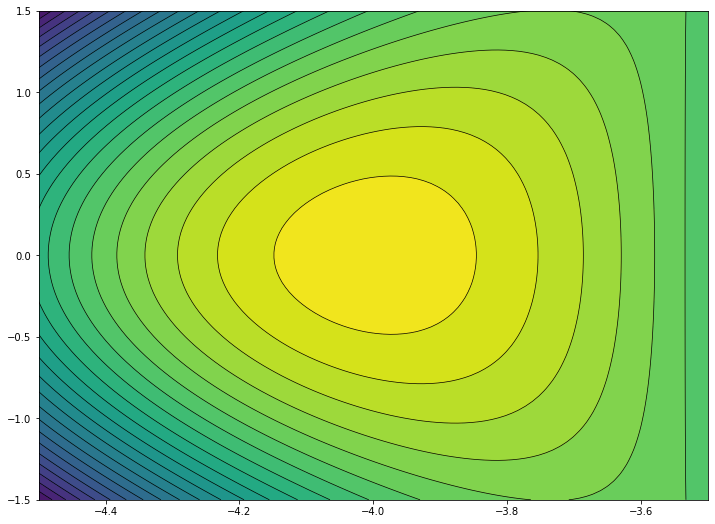

In [42]:
x1 = np.linspace(-4.5, -3.5, 100)
x2 = np.linspace(-1.5, 1.5, 100)
X1, X2 = np.meshgrid(x1, x2)  # create grid

# Compute Z values 
Z = Hsys1(X1, X2)

# Plot the contours
plt.figure(figsize=(12, 9))
plt.contour(X1, X2, Z, 25, linewidths=0.7, linestyles='solid', 
            colors='k')
plt.contourf(X1, X2, Z, 25)

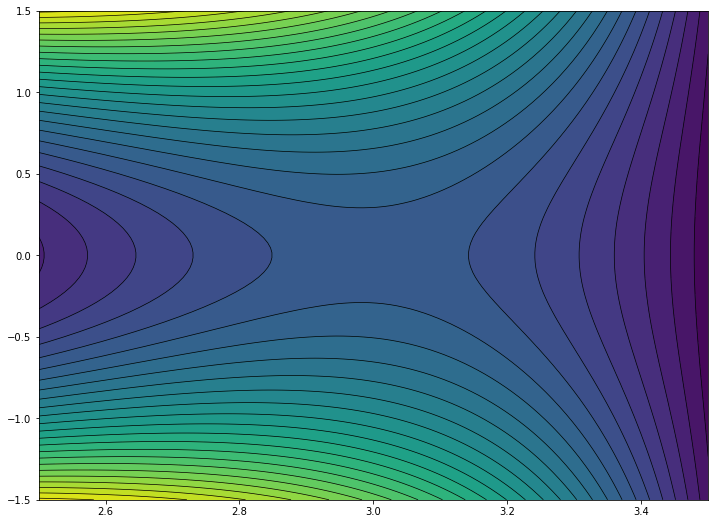

In [43]:
x1 = np.linspace(2.5, 3.5, 100)
x2 = np.linspace(-1.5, 1.5, 100)
X1, X2 = np.meshgrid(x1, x2)  # create grid

# Compute Z values 
Z = Hsys1(X1, X2)

# Plot the contours
plt.figure(figsize=(12, 9))
plt.contour(X1, X2, Z, 25, linewidths=0.7, linestyles='solid', 
            colors='k')
plt.contourf(X1, X2, Z, 25)

## Example 2

Duffing Eqn. - negative stiffness and postive cubic (e.g., essentially inverted pendulum) - Fixed points are (0, 0), (1, 0), and (-1, 0)

In [33]:
def sys2(t, x):
    return [x[1], x[0] - x[0]**3]

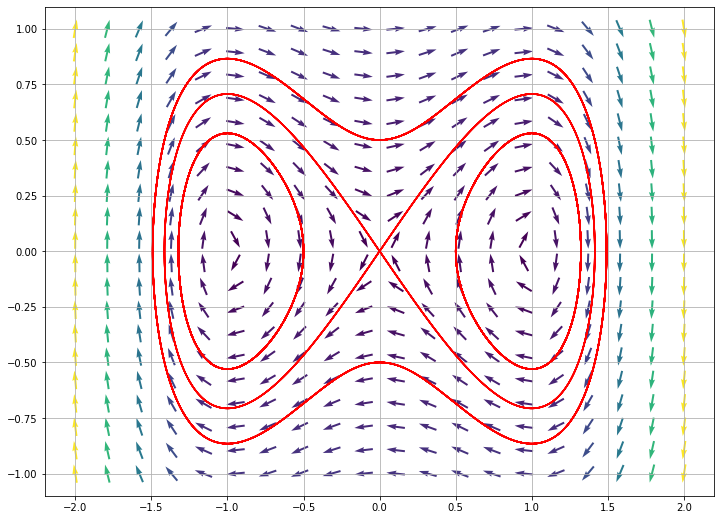

In [36]:
x0 = [
    [0.5, 0],
    [-0.5, 0],
    [0.0001, 0],
    [0.0, 0.5],
    [-0.0001, 0]
]

x1 = np.linspace(-2, 2, 20)
x2 = np.linspace(-1, 1, 20)

# Set up the figure the way we want it to look
plt.figure(figsize=(12, 9))

X1, X2, dx1, dx2, M = phasePlane(
    x1, x2, sys2
)

# Quiver plot
plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
plt.grid()

t1 = np.linspace(0, -50.0, 1000)
t2 = np.linspace(0, 50.0, 1000)
t_span1 = (np.max(t1), np.min(t1))
t_span2 = (np.min(t2), np.max(t2))
for x0i in x0:
    sol1 = solve_diffeq(sys2, t1, t_span1, x0i)
    plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
    sol2 = solve_diffeq(sys2, t2, t_span2, x0i)
    plt.plot(sol2.y[0, :], sol2.y[1, :], '-r')
           
plt.show()

## Example 3

Duffing Eqn. - positive stiffness and negative cubic - Fixed points are (0, 0), (1, 0), and (-1, 0)

In [37]:
def sys3(t, x):
    return [x[1], -x[0] + x[0]**3]

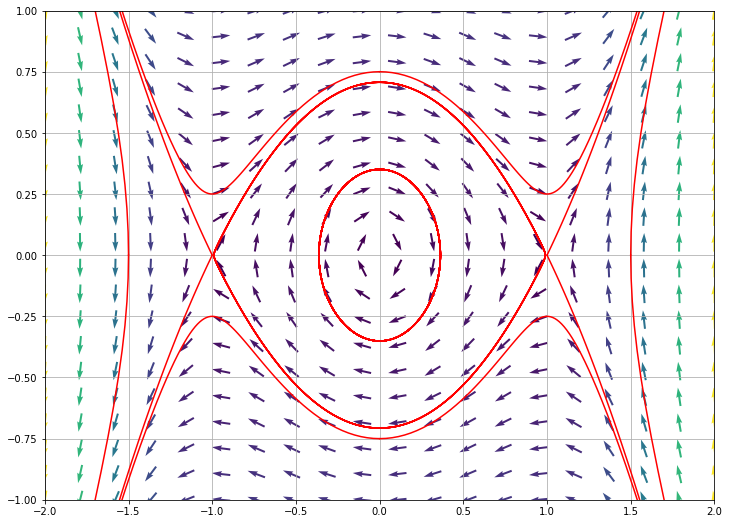

In [39]:
x0 = [
    [0.25, 0.25],
    [0.0, 0.75],
    [0.0, -0.75],
    [1.001, 0.0],
    [-1.001, 0.0],
    [0.99, 0],
    [1.5, 0],
    [-1.5, 0]
]

x1 = np.linspace(-2, 2, 20)
x2 = np.linspace(-1, 1, 20)

# Set up the figure the way we want it to look
plt.figure(figsize=(12, 9))

X1, X2, dx1, dx2, M = phasePlane(
    x1, x2, sys3
)

# Quiver plot
plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
plt.grid()

t1 = np.linspace(0, -50.0, 1000)
t2 = np.linspace(0, 50.0, 1000)
t_span1 = (np.max(t1), np.min(t1))
t_span2 = (np.min(t2), np.max(t2))
for x0i in x0:
    sol1 = solve_diffeq(sys3, t1, t_span1, x0i)
    plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
    sol2 = solve_diffeq(sys3, t2, t_span2, x0i)
    plt.plot(sol2.y[0, :], sol2.y[1, :], '-r')

plt.xlim(-2, 2)
plt.ylim(-1, 1)
plt.show()